<a href="https://colab.research.google.com/github/safal207/hello-world/blob/master/NLP_%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%82%D0%BE%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0_%D0%BE%D1%82%D0%B7%D1%8B%D0%B2%D0%BE%D0%B2_%D0%BD%D0%B0_%D1%84%D0%B8%D0%BB%D1%8C%D0%BC%D1%8B_%D0%B8%D0%B7_IMDb_(Internet_Movie_Database).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение тональности текста отзывов на фильмы из IMDb (Internet Movie Database) 


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Не забудьте подключить GPU, чтобы сеть обучалась быстрее (Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU).

## Набор данных IMDb movie review

[Набор данных IMDb movie review](https://ai.stanford.edu/~amaas/data/sentiment/) создан для задач определения тональности текста. Набор включает отзывы на фильмы с сайта [IMDb](https://www.imdb.com). Отзывы только явно положительные (оценка >= 7) или отрицательные (оценка <= 4), нейтральные отзывы в набор данных не включались.

Размер набора данных 50 тыс. отзывов:
- Набор данных для обучения - 25 тыс. отзывов
- Набор данных для тестирования - 25 тыс. отзывов

Количество положительных и отрицательных отзывов одинаковое.

Разметка набора данных:
- 0 - отзыв отрицательный
- 1 - отзыв положительный

С точки зрения машинного обучения это задача бинарной классификации.

Набор данных описан в статье: [Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)](https://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf).

<img src="https://www.dropbox.com/s/grd17bkapocb92o/imdb_movie_reviews.png?dl=1" width="600">


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

In [ ]:
max_words=10000

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

## Просмотр данных

Рецензия

In [ ]:
x_train[3]

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


Правильный ответ

In [ ]:
y_train[3]

1

## Раскодируем текст рецензии

В наборе данных IMDB используется частотное кодирование слов. Загрузим словарь, который использовался для кодирования.

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Преобразуем словарь, чтобы по номеру получать слово

In [ ]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

Печатаем 20 самых частых слов

In [ ]:
for i in range(1, 21):
    print(i, '->', reverse_word_index[i])


1 -> the
2 -> and
3 -> a
4 -> of
5 -> to
6 -> is
7 -> br
8 -> in
9 -> it
10 -> i
11 -> this
12 -> that
13 -> was
14 -> as
15 -> for
16 -> with
17 -> movie
18 -> but
19 -> film
20 -> on


Раскодируем сообщения

Служебные коды:  
0 - символ заполнитель  
1 - начало последовательности  
2 - неизвестное слово  

In [ ]:
index = 3
message = ''
for code in x_train[index]:
    word = reverse_word_index.get(code - 3, '?')
    message += word + ' '
message

"? the ? ? at storytelling the traditional sort many years after the event i can still see in my ? eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and ? of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional ? fact and fiction blend with ? role models warning stories ? magic and mystery br br my name is ? like my grandfather and his grandfather before him our prot

In [ ]:
y_train[index]

1

<img src="https://www.dropbox.com/s/esnt4eu5u7y57oh/seachd.png?dl=1" width="500">

## Подготовка данных для обучения

In [ ]:
maxlen = 200

In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [ ]:
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [ ]:
y_train[3]

1

## Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=25,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/25
176/176 [==============================] - 1s 3ms/step - loss: 102.0741 - accuracy: 0.5054 - val_loss: 40.1177 - val_accuracy: 0.5156
Epoch 2/25
176/176 [==============================] - 0s 3ms/step - loss: 19.8336 - accuracy: 0.5286 - val_loss: 9.7510 - val_accuracy: 0.4952
Epoch 3/25
176/176 [==============================] - 0s 3ms/step - loss: 4.8520 - accuracy: 0.5337 - val_loss: 2.8694 - val_accuracy: 0.5024
Epoch 4/25
176/176 [==============================] - 0s 3ms/step - loss: 2.5458 - accuracy: 0.5205 - val_loss: 2.5676 - val_accuracy: 0.4792
Epoch 5/25
176/176 [==============================] - 0s 3ms/step - loss: 2.0622 - accuracy: 0.5156 - val_loss: 2.3249 - val_accuracy: 0.4864
Epoch 6/25
176/176 [==============================] - 0s 3ms/step - loss: 1.7850 - accuracy: 0.5217 - val_loss: 1.6847 - val_accuracy: 0.5072
Epoch 7/25
176/176 [==============================] - 0s 3ms/step - loss: 1.3951 - accuracy: 0.5248 - val_loss: 2.2133 - val_accuracy: 0.4900
Ep

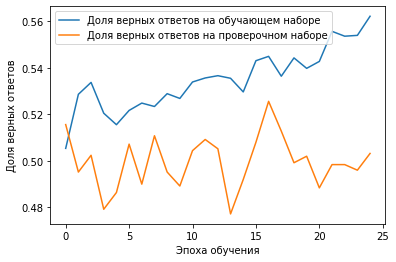

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Проверяем работу сети на тестовом наборе данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 1s 2ms/step - loss: 1.2180 - accuracy: 0.5015


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 50.152


## Подготовка данных для обучения Embedding


In [ ]:
max_words=10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [ ]:
#**Рецензия**
x_train[3]

[1,
 4,
 2,
 2,
 33,
 2804,
 4,
 2040,
 432,
 111,
 153,
 103,
 4,
 1494,
 13,
 70,
 131,
 67,
 11,
 61,
 2,
 744,
 35,
 3715,
 761,
 61,
 5766,
 452,
 9214,
 4,
 985,
 7,
 2,
 59,
 166,
 4,
 105,
 216,
 1239,
 41,
 1797,
 9,
 15,
 7,
 35,
 744,
 2413,
 31,
 8,
 4,
 687,
 23,
 4,
 2,
 7339,
 6,
 3693,
 42,
 38,
 39,
 121,
 59,
 456,
 10,
 10,
 7,
 265,
 12,
 575,
 111,
 153,
 159,
 59,
 16,
 1447,
 21,
 25,
 586,
 482,
 39,
 4,
 96,
 59,
 716,
 12,
 4,
 172,
 65,
 9,
 579,
 11,
 6004,
 4,
 1615,
 5,
 2,
 7,
 5168,
 17,
 13,
 7064,
 12,
 19,
 6,
 464,
 31,
 314,
 11,
 2,
 6,
 719,
 605,
 11,
 8,
 202,
 27,
 310,
 4,
 3772,
 3501,
 8,
 2722,
 58,
 10,
 10,
 537,
 2116,
 180,
 40,
 14,
 413,
 173,
 7,
 263,
 112,
 37,
 152,
 377,
 4,
 537,
 263,
 846,
 579,
 178,
 54,
 75,
 71,
 476,
 36,
 413,
 263,
 2504,
 182,
 5,
 17,
 75,
 2306,
 922,
 36,
 279,
 131,
 2895,
 17,
 2867,
 42,
 17,
 35,
 921,
 2,
 192,
 5,
 1219,
 3890,
 19,
 2,
 217,
 4122,
 1710,
 537,
 2,
 1236,
 5,
 736,
 10,
 10,


In [ ]:
#Правильный ответ
y_train[3]

1

In [ ]:


maxlen = 200

x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

In [ ]:
x_train[3]

array([   4,  341,    7,   27,  846,   10,   10,   29,    9, 1906,    8,
         97,    6,  236,    2, 1311,    8,    4,    2,    7,   31,    7,
          2,   91,    2, 3987,   70,    4,  882,   30,  579,   42,    9,
         12,   32,   11,  537,   10,   10,   11,   14,   65,   44,  537,
         75,    2, 1775, 3353,    2, 1846,    4,    2,    7,  154,    5,
          4,  518,   53,    2,    2,    7, 3211,  882,   11,  399,   38,
         75,  257, 3807,   19,    2,   17,   29,  456,    4,   65,    7,
         27,  205,  113,   10,   10,    2,    4,    2,    2,    9,  242,
          4,   91, 1202,    2,    5, 2070,  307,   22,    7, 5168,  126,
         93,   40,    2,   13,  188, 1076, 3222,   19,    4,    2,    7,
       2348,  537,   23,   53,  537,   21,   82,   40,    2,   13,    2,
         14,  280,   13,  219,    4,    2,  431,  758,  859,    4,  953,
       1052,    2,    7, 5991,    5,   94,   40,   25,  238,   60,    2,
          4,    2,  804,    2,    7,    4, 9941,  1

In [ ]:
y_train[3]

1

# Создание Нейронной сети Embedding

---



In [ ]:
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout


In [ ]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

#Обучаем НС

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=15,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 1s 5ms/step - loss: 0.6898 - accuracy: 0.5422 - val_loss: 0.6775 - val_accuracy: 0.6512
Epoch 2/15
176/176 [==============================] - 1s 4ms/step - loss: 0.6021 - accuracy: 0.7387 - val_loss: 0.5079 - val_accuracy: 0.8084
Epoch 3/15
176/176 [==============================] - 1s 4ms/step - loss: 0.4269 - accuracy: 0.8389 - val_loss: 0.3850 - val_accuracy: 0.8536
Epoch 4/15
176/176 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8747 - val_loss: 0.3366 - val_accuracy: 0.8696
Epoch 5/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2885 - accuracy: 0.8901 - val_loss: 0.3133 - val_accuracy: 0.8748
Epoch 6/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2586 - accuracy: 0.9058 - val_loss: 0.3018 - val_accuracy: 0.8804
Epoch 7/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2365 - accuracy: 0.9129 - val_loss: 0.2926 - val_accuracy: 0.8856
Epoch 

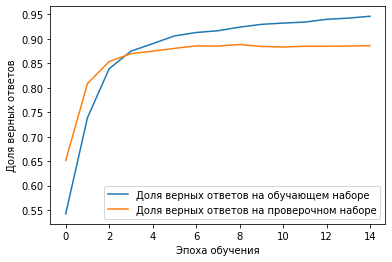

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
### Проверяем работу сети на тестовом наборе данных
scores = model.evaluate(x_test, y_test, verbose=1)


782/782 [==============================] - 1s 2ms/step - loss: 0.3019 - accuracy: 0.8734


Точность составила 87%

In [ ]:
## Исследуем обученное плотное векторное представление слов
#**Получаем матрицу плотных векторных представлений слов**
embedding_matrix = model.layers[0].get_weights()[0]
embedding_matrix[:5]


#**Загружаем словарь с номерами слов**
word_index_org = imdb.get_word_index()

Дополняем словарь служебными символами


In [ ]:
word_index = dict()
for word,number in word_index_org.items():
    word_index[word] = number + 3
word_index["<Заполнитель>"] = 0
word_index["<Начало последовательности>"] = 1
word_index["<Неизвестное слово>"] = 2  
word_index["<Не используется>"] = 3

**Ищем векторы для слов**

In [ ]:
word = 'good'
word_number = word_index[word]
print('Номер слова', word_number)
print('Вектор для слова', embedding_matrix[word_number])

Номер слова 52
Вектор для слова [-0.15903033 -0.1569495 ]


## Сохраняем обученные плотные векторные представления в файл


**Составляем реверсивный словарь токенов (слов)**


In [ ]:
reverse_word_index = dict()
for key, value in word_index.items():
    reverse_word_index[value] = key

Записываем плотные векторные представления в файл


In [ ]:
filename = 'imdb_embeddings.csv'

In [ ]:
with open(filename, 'w') as f:
    for word_num in range(max_words):
      word = reverse_word_index[word_num]
      vec = embedding_matrix[word_num]
      f.write(word + ",")
      f.write(','.join([str(x) for x in vec]) + "\n")

In [ ]:
!head -n 20 $filename

<Заполнитель>,-0.016811058,0.013367372
<Начало последовательности>,0.1097743,0.116271816
<Неизвестное слово>,0.037610132,0.01668866
<Не используется>,0.00078488514,-0.027517617
the,-0.024077024,-0.035351958
and,-0.08876018,-0.040504538
a,-0.0141621055,0.0008033097
of,0.015001034,0.014801426
to,0.0045481375,-0.008341472
is,-0.06415439,-0.038430057
br,0.041057415,-0.0062467526
in,-0.029638084,-0.012409633
it,-0.03762376,-0.077604204
i,-0.02118366,0.0032353885
this,-0.0005114212,0.03564617
that,-0.0075916336,-0.0009934852
was,0.023813233,0.051122207
as,-0.045547895,0.014432383
for,-0.005541032,0.038816705
with,-0.0025535058,-0.0048452183


**Сохраняем файл на локальный компьютер**


In [ ]:
from google.colab import files
%matplotlib inline 

In [ ]:
files.download('imdb_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Визуализация плотных векторных представлений слов

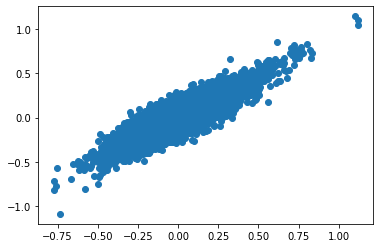

In [ ]:
plt.scatter(embedding_matrix[:,0], embedding_matrix[:,1])

**Выбираем коды слов, по которым можно определить тональность отзыва**

In [ ]:
review = ['brilliant', 'fantastic', 'amazing', 'good',
          'bad', 'awful','crap', 'terrible', 'trash']
enc_review = []
for word in review:
    enc_review.append(word_index[word])
enc_review

[530, 777, 480, 52, 78, 373, 595, 394, 1157]

In [ ]:
#Получаем векторное представление интересующих нас слов

In [ ]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[-0.52133644, -0.4790809 ],
       [-0.5515863 , -0.43264905],
       [-0.6037977 , -0.5355316 ],
       [-0.15903033, -0.1569495 ],
       [ 0.46438783,  0.445389  ],
       [ 1.1181571 ,  1.0401738 ],
       [ 0.51261026,  0.50404197],
       [ 0.7189229 ,  0.6947241 ],
       [ 0.22840212,  0.2401237 ]], dtype=float32)

In [ ]:
#Визуализация обученного плотного векторного представления слов, по которым можно определить эмоциональную окраску текста

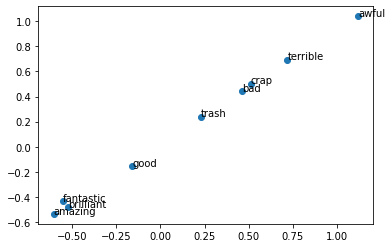

In [ ]:
plt.scatter(review_vectors[:,0], review_vectors[:,1])
for i, txt in enumerate(review):
    plt.annotate(txt, (review_vectors[i,0], review_vectors[i,1]))

# Функция для кодирования one hot encoding

In [ ]:
max_words=10000

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(x_train, max_words)
x_test = vectorize_sequences(x_test, max_words)

In [ ]:
x_train[0][:50]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.])

In [ ]:
len(x_train[0])

10000

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1)

Epoch 1/10
176/176 [==============================] - 1s 6ms/step - loss: 0.3349 - accuracy: 0.8570 - val_loss: 0.2760 - val_accuracy: 0.8904
Epoch 2/10
176/176 [==============================] - 1s 5ms/step - loss: 0.1695 - accuracy: 0.9353 - val_loss: 0.3049 - val_accuracy: 0.8896
Epoch 3/10
176/176 [==============================] - 1s 5ms/step - loss: 0.0992 - accuracy: 0.9641 - val_loss: 0.3789 - val_accuracy: 0.8808
Epoch 4/10
176/176 [==============================] - 1s 5ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.4917 - val_accuracy: 0.8856
Epoch 5/10
176/176 [==============================] - 1s 5ms/step - loss: 0.0092 - accuracy: 0.9979 - val_loss: 0.6207 - val_accuracy: 0.8800
Epoch 6/10
176/176 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.7380 - val_accuracy: 0.8852
Epoch 7/10
176/176 [==============================] - 1s 5ms/step - loss: 3.7696e-04 - accuracy: 1.0000 - val_loss: 0.7983 - val_accuracy: 0.8848
Ep

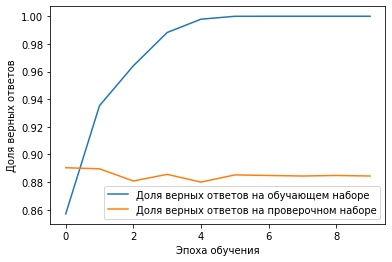

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
## Проверяем работу сети на тестовом наборе данных
scores = model.evaluate(x_test, y_test, verbose=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.9523 - accuracy: 0.8648


# Результ one hot encoding: 86%

In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 86.476


# Вывод: Эмбедингом точность модели дала лучший результа около 87%